In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df = pd.read_excel("Profile_Analysis.xlsx")

In [3]:
#                      Information about Data Set
# Display basic information
print(df.info())
# Display descriptive statistics
print(df.describe())
# Display the first few rows of the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1240 non-null   object 
 1   Sex     1240 non-null   object 
 2   Age     1240 non-null   int64  
 3   DEM_Ap  1239 non-null   object 
 4   DEM_Pe  1240 non-null   object 
 5   DEM_Co  1226 non-null   float64
 6   DEM     1225 non-null   object 
 7   AWF_Ap  1238 non-null   object 
 8   AWF_Pe  1239 non-null   object 
 9   AWF_Co  1240 non-null   float64
 10  AWF     1239 non-null   object 
 11  FI_Ap   1240 non-null   float64
 12  FI_Pe   1239 non-null   object 
 13  FI_Co   1238 non-null   object 
 14  FI      1239 non-null   float64
 15  CON_Ap  1240 non-null   float64
 16  CON_Pe  1240 non-null   float64
 17  CON_Co  1240 non-null   object 
 18  CON     1239 non-null   object 
 19  Ap      1239 non-null   float64
 20  Pe      1240 non-null   float64
 21  Co      1225 non-null   float64
 22  

ID         0
Sex        0
Age        0
DEM_Ap     1
DEM_Pe     0
DEM_Co    14
DEM       15
AWF_Ap     2
AWF_Pe     1
AWF_Co     0
AWF        1
FI_Ap      0
FI_Pe      1
FI_Co      2
FI         1
CON_Ap     0
CON_Pe     0
CON_Co     0
CON        1
Ap         1
Pe         0
Co        15
TOTAL     15
dtype: int64


C:\Users\Syed Sarib Naveed\AppData\Local\Temp\ipykernel_6560\3585475470.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


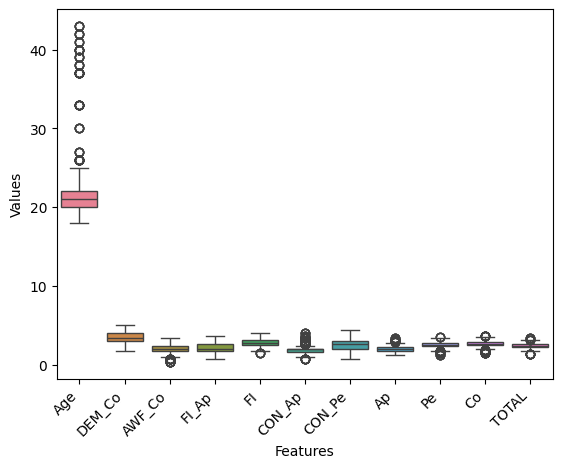

In [5]:
#                         Checking Missing Values
# Check for missing values
print(df.isnull().sum())
# Visualize outliers using box plots or other relevant plots
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the figure and axes
fig, ax = plt.subplots()
sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# Set x and y labels
plt.xlabel('Features')
plt.ylabel('Values')     
plt.show()

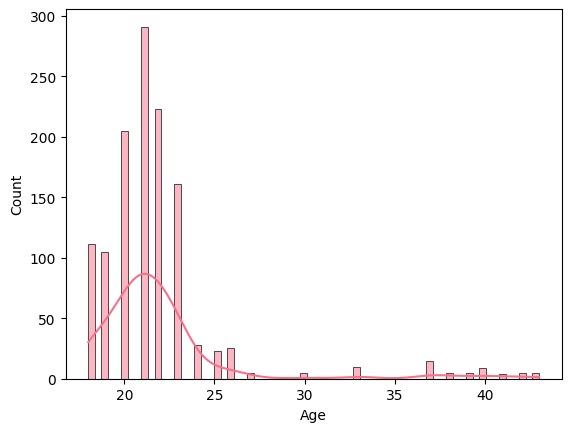

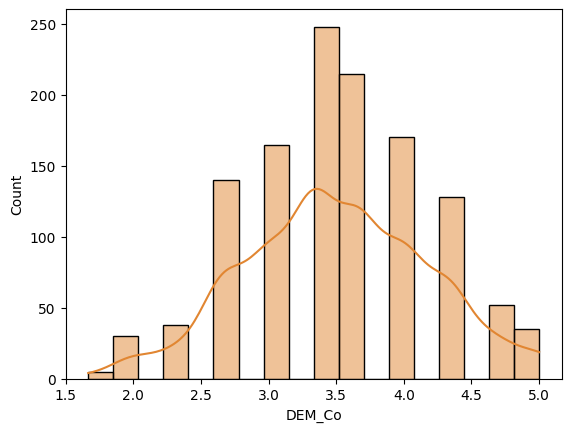

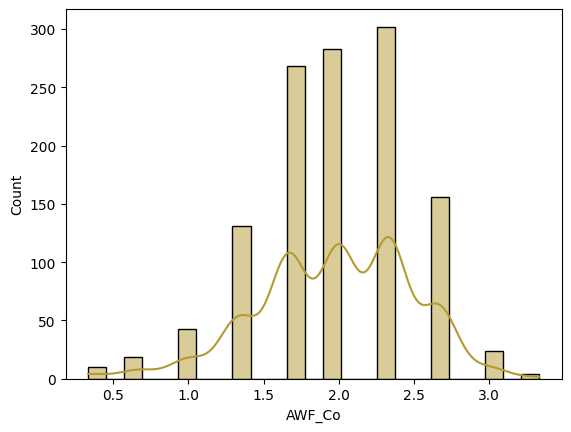

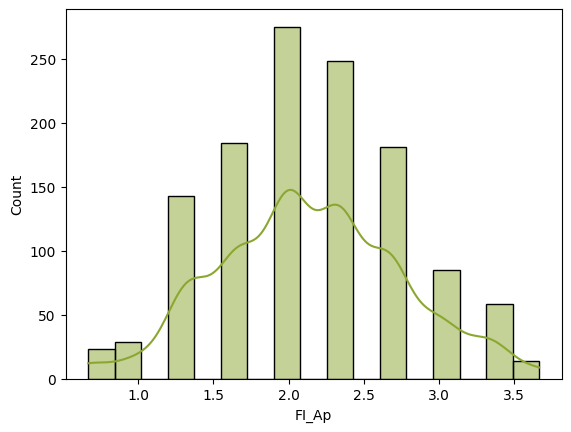

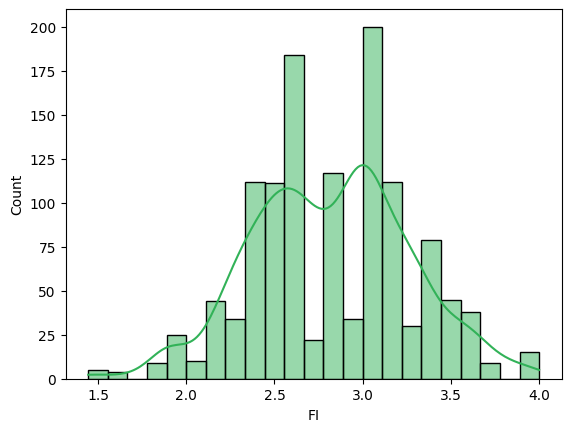

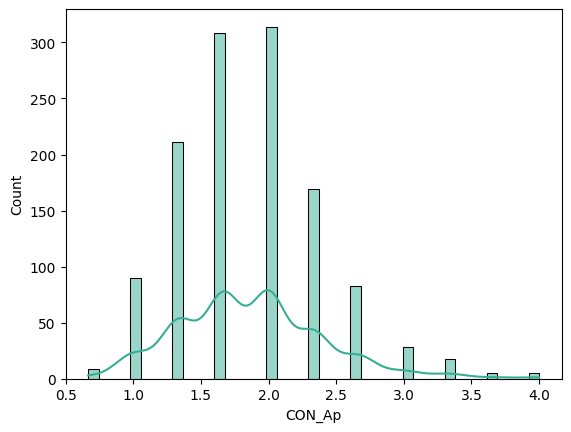

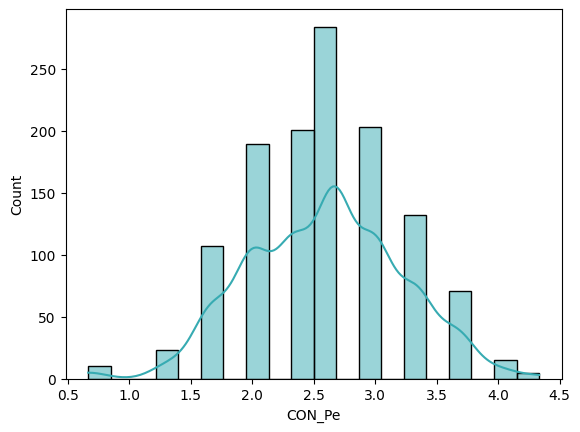

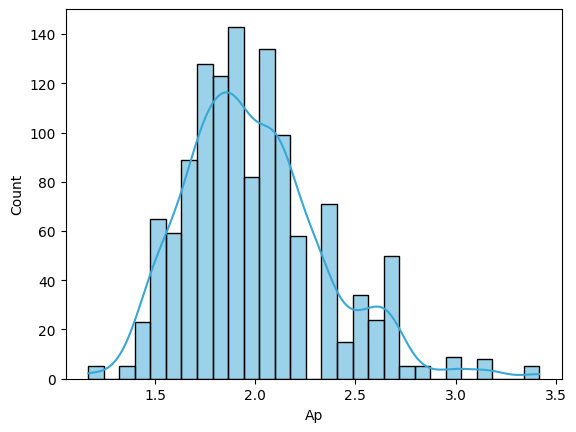

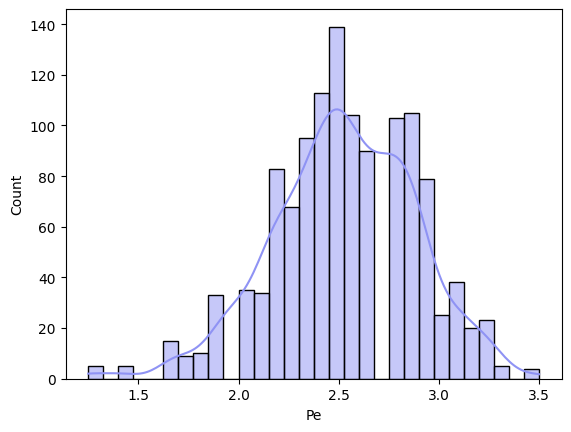

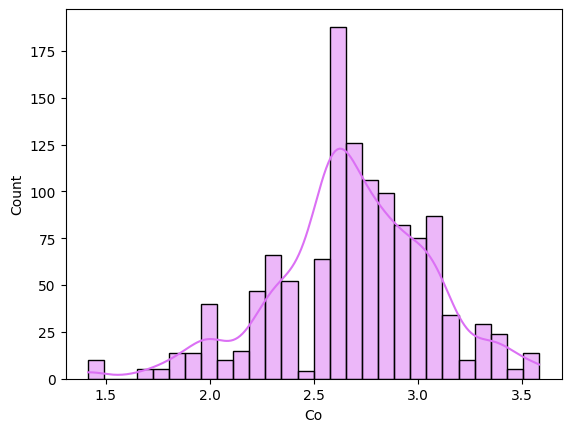

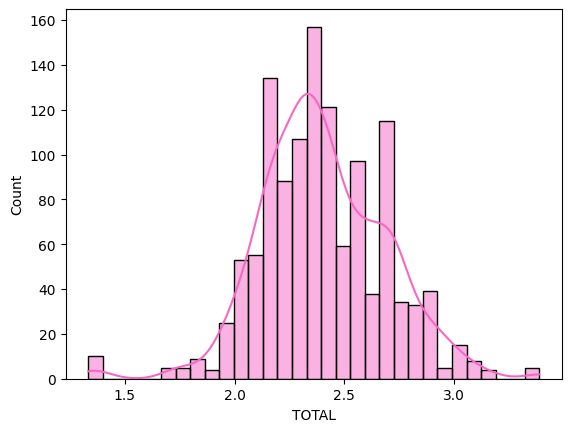

In [6]:
#                       Analyze Variables
# Analyze numerical variables
numerical_columns = df.select_dtypes(exclude='object').columns
for col in df.select_dtypes(exclude='object').columns:
    color = sns.color_palette('husl', n_colors=len(numerical_columns))[numerical_columns.get_loc(col)]
    # Create a histogram with a different color for each plot
    sns.histplot(df[col], kde=True, color=color, label=col)
    plt.show()

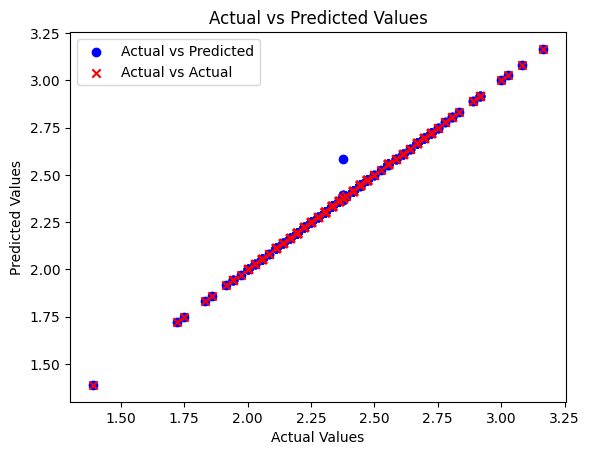

Mean Squared Error: 0.00018055614001545988


In [7]:
#                   Data Cleaning and Model Implementation

# Separate features (X) and target variable (Y)
X = df.drop('TOTAL', axis=1)
Y = df['TOTAL']
X = X.select_dtypes(exclude='object')
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Impute missing values with the mean for numerical columns
numerical_cols = X_train.select_dtypes(exclude='object').columns
categorical_cols = X_train.select_dtypes(include='object').columns
imputer = SimpleImputer(strategy='mean')
X_train[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])

# Impute missing values in the target variable (Y_train)
Y_train = Y_train.fillna(Y_train.mean())
Y_test = Y_test.fillna(Y_test.mean())

#apply linear regression
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

plt.scatter(Y_test, Y_pred, color='blue', label='Actual vs Predicted')
plt.scatter(Y_test, Y_test, color='red', label='Actual vs Actual', marker='x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()
# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
